In [27]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
import os
os.environ['OMP_NUM_THREADS'] = '1'
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [28]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [29]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [30]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [31]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_market_data)

In [32]:
# Create a DataFrame with the scaled data
df_scaled_data = pd.DataFrame(scaled_data, columns=df_market_data.columns)

# Copy the crypto names from the original data
crypto_names = df_market_data.index
# Set the coinid column as index
df_scaled_data['coin_id'] = crypto_names
df_scaled_data.set_index('coin_id', inplace=True)

# Display sample data
df_scaled_data.head(10)


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


---

### Find the Best Value for k Using the Original Data.

In [33]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 11))

In [36]:
print("OMP_NUM_THREADS:", os.environ.get('OMP_NUM_THREADS'))

OMP_NUM_THREADS: 1


In [37]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list

for i in k_values:
    k_model = KMeans(n_clusters=i, n_init=10, random_state=0)
    k_model.fit(df_scaled_data)
    inertia.append(k_model.inertia_)


C:\Users\thaox\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\thaox\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\thaox\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\thaox\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is k

In [38]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()


,k,inertia
0,1,287.000000
1,2,198.571818
2,3,123.190482
3,4,79.022435
4,5,65.302379


In [39]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow.hvplot.line(x='k', y='inertia', xlabel='Number of Clusters (k)', ylabel='Inertia',
                     title='Elbow Curve to Determine Optimal k', height=400, width=800)

:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [40]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=0)

In [41]:
# Fit the K-Means model using the scaled data
model.fit(df_scaled_data)

C:\Users\thaox\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\thaox\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [42]:
# Predict the clusters to group the cryptocurrencies using the scaled data
kMeans_predictions = model.predict(df_scaled_data)

# Print the resulting array of cluster values.
print(kMeans_predictions)


[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [43]:
# Create a copy of the DataFrame
df_market_data_scaled_predictions = df_scaled_data.copy()

In [44]:
# Add a new column to the DataFrame with the predicted clusters
df_market_data_scaled_predictions["Clusters"]= kMeans_predictions

# Display sample data
df_market_data_scaled_predictions.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [87]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
folder_path = "C:/Users/thaox/OneDrive/Documents/Class/Analysis Projects/Module 19/Starter_Code"
plot_filename = "Cryptocurrency_Clustering.png"
plot_path = os.path.join(folder_path, plot_filename)

scatter_plot = df_market_data_scaled_predictions.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="Clusters", 
    title="Cryptocurrency Clustering",
    xlabel="Price Change Percentage (24h)",
    ylabel="Price Change Percentage (7d)"
)
hvplot.save(scatter_plot, plot_path)
# Display the scatter plot
scatter_plot

:NdOverlay   [Clusters]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)

---

### Optimize Clusters with Principal Component Analysis.

In [88]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [89]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
crypto_pca_data = pca.fit_transform(df_market_data)

# View the first five rows of the DataFrame. 
crypto_pca_data[:5]


array([[-341.80096268,  -51.36677548,   12.52547089],
       [-249.42046633,   24.11754777,  -14.23146597],
       [-402.61472077, -118.71073742,   24.83839662],
       [-406.75243715,  -79.48728629,    1.56633057],
       [-382.42994789, -103.43195906,   16.75307273]])

In [90]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([9.76037313e-01, 2.30282949e-02, 7.48308214e-04])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:**  Total explained variance = 0.976037313 + 0.023028295 + 0.000748308214
                          ≈ 0.999813916214
                          = Approximately 99.98%

In [91]:
# Create a new DataFrame with the PCA data.
df_crypto_pca = pd.DataFrame(crypto_pca_data, columns=['PC1',"PC2","PC3"])

# Creating a DataFrame with the PCA data

# Copy the crypto names from the original data
df_crypto_pca["coin_id"]=df_market_data.index

# Set the coinid column as index
df_crypto_pca=df_crypto_pca.set_index('coin_id')

# Display sample data
df_crypto_pca.head()


,PC1,PC2,PC3
coin_id,,,
bitcoin,-341.800963,-51.366775,12.525471
ethereum,-249.420466,24.117548,-14.231466
tether,-402.614721,-118.710737,24.838397
ripple,-406.752437,-79.487286,1.566331
bitcoin-cash,-382.429948,-103.431959,16.753073


---

### Find the Best Value for k Using the PCA Data

In [92]:
# Create a list with the number of k-values from 1 to 11
k =list(range(1,11))

In [93]:
# Create an empty list to store the inertia values
inertia=[]

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    model =KMeans(n_clusters=i, random_state=0)
    model.fit(df_crypto_pca)
    inertia.append(model.inertia_)


C:\Users\thaox\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\thaox\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\thaox\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\thaox\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak

In [94]:
elbow_data_crypto_pca = {
    "k": k,
    "inertia": inertia
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_data_crypto_pca = pd.DataFrame(elbow_data_crypto_pca)


In [95]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_data_crypto_pca = df_elbow_data_crypto_pca.hvplot.line(x="k", y="inertia", title="Elbow Curve Using PCA Data", xticks=k)
elbow_data_crypto_pca

:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** k = 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No, it is the same.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [96]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4)

In [97]:
# Fit the K-Means model using the PCA data
model.fit(df_crypto_pca)

C:\Users\thaox\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\thaox\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [98]:
# Predict the clusters to group the cryptocurrencies using the PCA data
cryto_clusters_pca = model.predict(df_crypto_pca)
# Print the resulting array of cluster values.
print(cryto_clusters_pca)

[3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 1 3 0 0 2
 3 3 3 0]


In [99]:
# Create a copy of the DataFrame with the PCA data
df_cryto_clusters_pca=df_crypto_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_cryto_clusters_pca['Crypto Cluster']=cryto_clusters_pca

# Display sample data
df_cryto_clusters_pca.head()


,PC1,PC2,PC3,Crypto Cluster
coin_id,,,,
bitcoin,-341.800963,-51.366775,12.525471,3
ethereum,-249.420466,24.117548,-14.231466,3
tether,-402.614721,-118.710737,24.838397,3
ripple,-406.752437,-79.487286,1.566331,3
bitcoin-cash,-382.429948,-103.431959,16.753073,3


In [100]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
folder_path = "C:/Users/thaox/OneDrive/Documents/Class/Analysis Projects/Module 19/Starter_Code"
plot_filename = "Cryptocurrency_Clustering_PCA.png"
plot_path = os.path.join(folder_path, plot_filename)
scatter_plot_PCA = df_cryto_clusters_pca.hvplot.scatter(
    x="PC1",
    y="PC2",
    hover_cols=["coin_id"],
    by="Crypto Cluster",
    title="Scatter Plot by Crypto Name PCA Data",
    xlabel="PC1",
    ylabel="PC2"
)
hvplot.save(scatter_plot, plot_path)
scatter_plot_PCA

:NdOverlay   [Crypto Cluster]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

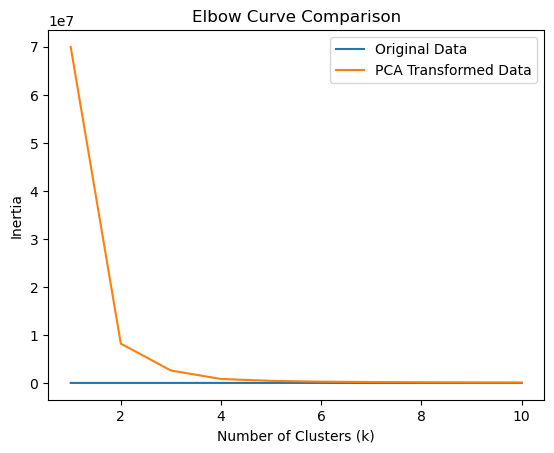

In [101]:
# Composite plot to contrast the Elbow curves

import matplotlib.pyplot as plt

# Plot the Elbow curve for the original data
plt.plot(df_elbow['k'], df_elbow['inertia'], label='Original Data')

# Plot the Elbow curve for the PCA-transformed data
plt.plot(elbow_data_crypto_pca['k'], elbow_data_crypto_pca['inertia'], label='PCA Transformed Data')


# Add labels and title
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve Comparison')
plt.legend()
plt.savefig('Elbow_Curve_Comparison.png')
plt.show()

In [31]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!
see above. 

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Using fewer features for clustering with K-Means can simplify the model, make it cleaner & clearer visually and as is the example we see above. However, it may lead to information loss, and affect cluster separation.